#### Part b

In [287]:
import random
from random import choice
from matplotlib import pyplot as plt 

In [288]:
def get_f_AB(A,B):
    if A==0:
        if B == 0:
            return 30
        elif B == 1:
            return 5
    elif A == 1:
        if B == 0:
            return 1
        elif B == 1:
            return 10

In [289]:
def get_f_DA(D,A):
    if D==0:
        if A == 0:
            return 100
        elif A == 1:
            return 1
    elif D == 1:
        if A == 0:
            return 1
        elif A == 1:
            return 100

In [290]:
def get_f_BC(B,C):
    if B==0:
        if C == 0:
            return 100
        elif C == 1:
            return 1
    elif B == 1:
        if C == 0:
            return 1
        elif C == 1:
            return 100

In [291]:
def get_f_CD(C,D):
    if C==0:
        if D == 0:
            return 1
        elif D == 1:
            return 100
    elif C == 1:
        if D == 0:
            return 100
        elif D == 1:
            return 1

In [292]:
def normalize(a,b):
    total = a + b
    return (a/total, b/total)

def resample(probOfZeroVal):
    # 1: true, 0: false
    # |---0val---|-------1val------|
    # 0                            1
    return random.uniform(0,1) > probOfZeroVal

In [293]:
def generate_sample(curr_sample_var, A,C,D):
    B = 1  # observed value
    if curr_sample_var == "A":
        (a0, a1) = (get_f_AB(0,B)* get_f_DA(D, 0), get_f_AB(1,B)* get_f_DA(D, 1))
        (a0, a1) = normalize(a0, a1)
        A = resample(a0)
    elif curr_sample_var == "C":
        (c0, c1) = (get_f_BC(B,0)*get_f_CD(0,D), get_f_BC(B,1)*get_f_CD(1,D))
        (c0, c1) = normalize(c0, c1)
        C = resample(c0)
    elif curr_sample_var == "D":
        (d0, d1) = (get_f_CD(C, 0)* get_f_DA(0, A), get_f_CD(C, 1)* get_f_DA(1, A))
        (d0, d1) = normalize(d0, d1)
        D = resample(d0)
    return A,C,D

In [294]:
def next_sample_var(curr_var):
    return choice(["A", "C", "D"])

In [295]:
a0_num = 0
a1_num = 0
sample_size = 1000000
curr_sample_var = "A"
B = 1  # fixed, observed value

# randomly initialize values for A,C,D
A = choice([0, 1])
C = choice([0, 1])
D = choice([0, 1])


# probA[0] = probability of a0 given b1
# probA[1] = probability of a1 given b1
probA = [[],[]]

In [296]:
for i in range(1, sample_size + 1):
    if A == 0:
        a0_num += 1
    elif A == 1:
        a1_num += 1
    probA[0].append(a0_num/i)
    probA[1].append(a1_num/i)
    
    # select next variable to sample on
    curr_sample_var = next_sample_var(curr_sample_var)
    (A, C, D) = generate_sample(curr_sample_var, A,C,D)

In [309]:
GS_a0 = probA[0][sample_size-1]
print("The estimate of P(A=a0|b1) using Gibbs Sampling with {} samples is: {:.5}"
        .format(sample_size, GS_a0))

The estimate of P(A=a0|b1) using Gibbs Sampling with 1000000 samples is: 0.94343


In [307]:
GS_a1 = probA[1][sample_size-1]
print("The estimate of P(A=a1|b1) using Gibbs Sampling with {} samples is: {:.5}"
        .format(sample_size,GS_a1))

The estimate of P(A=a1|b1) using Gibbs Sampling with 1000000 samples is: 0.056574


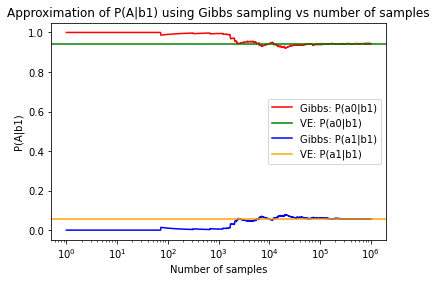

In [308]:
x = list(range(1, sample_size+1))
y0 = probA[0]
y1 = probA[1]

# P(a0|b1) from Question 1 part a 
ve_a0 = 5001500/5301510

# P(a1|b1) from Question 1 part a 
ve_a1 = 300010/5301510

plt.plot(x,y0, c = "r")
plt.axhline(ve_a0, c = "g")
plt.plot(x,y1, c = "b")
plt.axhline(ve_a1, c = "orange")
plt.legend(labels = ["Gibbs: P(a0|b1)","VE: P(a0|b1)",
                    "Gibbs: P(a1|b1)", "VE: P(a1|b1)"])
plt.title('Approximation of P(A|b1) using Gibbs sampling vs number of samples') 
plt.xlabel('Number of samples')
plt.ylabel('P(A|b1)')
plt.xscale("log")
plt.show()